## Import libraries and load dataset

In [2]:
# import libraries
# for data manipulation and analysis
import pandas as pd

# for data preprocessing
import numpy as np

# for visualixation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading dataset

df = pd.read_csv('Student_Marks.csv', decimal=',')

## View the data

In [4]:
df.head()

,first_ut_marks,second_ut_marks,assignment_marks,final_marks
0,40,35,77,76
1,41,38,59,69
2,35,38,81,77
3,48,40,74,81
4,48,37,95,95


In [5]:
df.tail()

,first_ut_marks,second_ut_marks,assignment_marks,final_marks
45,42,41,65,67
46,38,39,88,76
47,41,36,69,78
48,37,33,86,80
49,31,48,83,85


In [6]:
# dimensions of the data
df.shape

(50, 4)

In [7]:
# statistical summary of the data
df.describe()

,first_ut_marks,second_ut_marks,assignment_marks,final_marks
count,50.000000,50.000000,50.000000,50.000000
mean,39.620000,40.040000,77.540000,77.860000
std,5.110573,4.650916,12.465806,8.490114
min,29.000000,23.000000,54.000000,61.000000
25%,36.000000,37.000000,67.500000,72.000000
50%,40.000000,39.500000,78.500000,77.500000
75%,42.750000,43.000000,86.750000,83.750000
max,49.000000,50.000000,99.000000,96.000000


In [8]:
# view the data more clearly
pd.set_option('precision', 2)
df.describe()

,first_ut_marks,second_ut_marks,assignment_marks,final_marks
count,50.00,50.00,50.00,50.00
mean,39.62,40.04,77.54,77.86
std,5.11,4.65,12.47,8.49
min,29.00,23.00,54.00,61.00
25%,36.00,37.00,67.50,72.00
50%,40.00,39.50,78.50,77.50
75%,42.75,43.00,86.75,83.75
max,49.00,50.00,99.00,96.00


In [9]:
# data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   first_ut_marks    50 non-null     int64
 1   second_ut_marks   50 non-null     int64
 2   assignment_marks  50 non-null     int64
 3   final_marks       50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


## Handling missing values

In [10]:
df.isnull().sum()

first_ut_marks      0
second_ut_marks     0
assignment_marks    0
final_marks         0
dtype: int64

## Pair plot of correlation

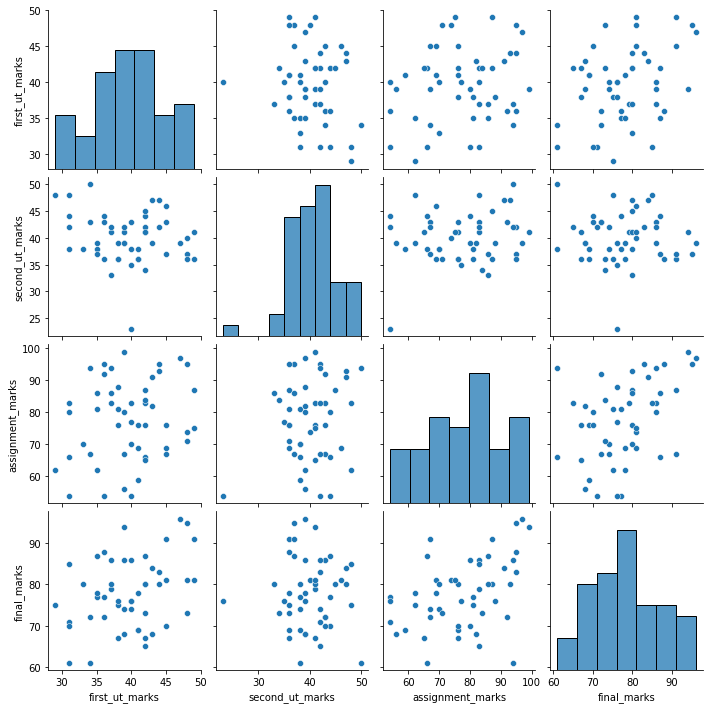

In [11]:
sns.pairplot(df)

## Creating/spliting train and test dataset

In [14]:
x = df.iloc[:, :-1].values
x

array([[40, 35, 77],
       [41, 38, 59],
       [35, 38, 81],
       [48, 40, 74],
       [48, 37, 95],
       [47, 39, 97],
       [44, 42, 95],
       [49, 36, 87],
       [31, 42, 54],
       [40, 43, 83],
       [43, 39, 82],
       [34, 43, 67],
       [42, 44, 66],
       [41, 36, 76],
       [34, 50, 94],
       [36, 43, 92],
       [29, 48, 62],
       [37, 41, 83],
       [45, 46, 69],
       [35, 37, 86],
       [36, 44, 54],
       [42, 41, 76],
       [40, 23, 54],
       [39, 41, 99],
       [42, 42, 83],
       [31, 38, 66],
       [40, 38, 70],
       [39, 39, 56],
       [36, 36, 95],
       [44, 47, 93],
       [48, 36, 71],
       [49, 41, 75],
       [35, 39, 62],
       [38, 36, 76],
       [39, 42, 67],
       [31, 44, 80],
       [39, 39, 80],
       [45, 37, 67],
       [42, 34, 84],
       [42, 45, 87],
       [45, 43, 76],
       [33, 38, 70],
       [43, 47, 91],
       [38, 36, 81],
       [37, 42, 94],
       [42, 41, 65],
       [38, 39, 88],
       [41, 3

In [18]:
y = df.iloc[:, -1].values
y

array([76, 69, 77, 81, 95, 96, 83, 91, 71, 86, 68, 72, 87, 69, 61, 72, 75,
       79, 81, 87, 77, 80, 76, 94, 65, 61, 74, 68, 88, 80, 73, 81, 78, 67,
       74, 70, 86, 91, 73, 80, 70, 80, 84, 75, 86, 67, 76, 78, 80, 85],
      dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=30)

## linear regression

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [21]:
coef = regressor.coef_
interc = regressor.intercept_

print(f"Coefficent: {coef}\nIntercept: {interc}")

Coefficent: [ 0.45481971 -0.17756832  0.29550765]
Intercept: 44.28689525970813


In [32]:
y_pred = regressor.predict(X_test)
print(y_pred)

[73.23388453 68.8048114  71.60189446 79.1137038  81.15060501 83.43546225
 77.63616557 71.14221454 74.36600655 79.04921459]


In [33]:
difference = Y_test - y_pred
diff = np.round(difference, 2)
df1 = pd.DataFrame(
    {
        'Actual': Y_test,
        'Predicted': y_pred,
        'Difference': diff
    }
)
df1.head()

,Actual,Predicted,Difference
0,80,73.23,6.77
1,77,68.80,8.20
2,78,71.60,6.40
3,75,79.11,-4.11
4,68,81.15,-13.15


ValueError: x and y must be the same size

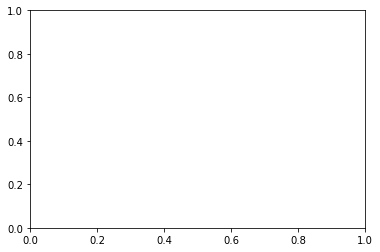

In [37]:

plt.scatter(x=X_test, y=Y_test, color='green')
#plt.plot(X_test, y_pred, color="orange")

#plt.title("Actual v/s Predicted\n", color='maroon')
#plt.xlabel("\n (X_Test)", color='blue')
#plt.ylabel("\n (Y_Test)", color='blue')
plt.show()